### PET from BOM AWRA-L for MDB

In [14]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
dirpet = '/g/data/oe9/user/rg6346/PET_BOM_AWRA/pet_avg_Actual_month.nc'
petnc = xr.open_dataset(dirpet)
petnc = petnc.rename({'e0_avg':'pet'})
petnc = petnc.where(petnc>=0, np.nan)
petnc = petnc.squeeze()
petnc

<xarray.Dataset>
Dimensions:      (latitude: 681, longitude: 841, nv: 2, time: 217)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-31 2000-02-29 2000-03-31 ...
  * latitude     (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude    (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 ...
Dimensions without coordinates: nv
Data variables:
    time_bounds  (time, nv) float64 3.652e+04 3.656e+04 3.656e+04 3.658e+04 ...
    pet          (time, latitude, longitude) float64 nan nan nan nan nan nan ...
Attributes:
    var_name:  e0_avg

In [ ]:
mask_path = '/g/data/oe9/project/team-drip/MDB_MASK/MASK_ARRAY_AWRA.nc'
petmask = xr.open_dataarray(mask_path)
petnc = petnc.where(petmask, drop=True)
petnc

### Plot sample of PET (monthly)

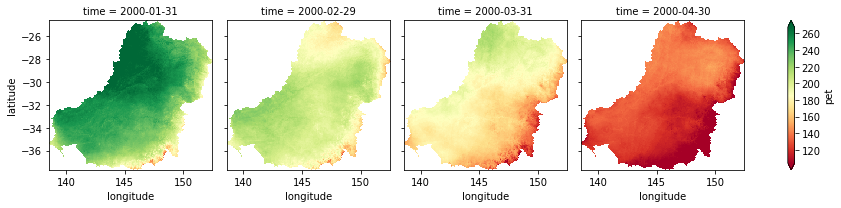

In [21]:
%matplotlib inline
petnc.pet.isel(time=range(0,4)).plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'RdYlGn')
